<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW10_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B%20%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

**a) Для отображения картинки воспользуйтесь вспомогательной функцией:**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage

In [ ]:
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

**b) Для загрузки картинки можно использовать код:**

In [ ]:
img = cv2.imread('bCWQ7lMg.jpeg')

In [ ]:
img = cv2.resize(img, (128, 128))

In [ ]:
img

array([[[255,  92,   0],
        [255,  95,   1],
        [254,  97,   0],
        ...,
        [252,  78,   1],
        [250,  76,   0],
        [249,  78,   3]],

       [[255,  95,   5],
        [254,  97,   0],
        [255,  99,   0],
        ...,
        [253,  79,   2],
        [249,  78,   2],
        [248,  76,   0]],

       [[253,  95,   1],
        [255, 100,   1],
        [254, 100,   0],
        ...,
        [252,  81,   1],
        [253,  80,   0],
        [250,  79,   1]],

       ...,

       [[124,  50,   2],
        [132,  55,   2],
        [133,  60,   0],
        ...,
        [126,  24,   1],
        [125,  25,   1],
        [119,  20,   0]],

       [[131,  57,   3],
        [132,  55,   0],
        [135,  56,   3],
        ...,
        [127,  23,   0],
        [125,  21,   0],
        [124,  22,   3]],

       [[131,  46,   0],
        [210, 234, 235],
        [ 78, 142, 110],
        ...,
        [162, 216, 171],
        [130,  23,   2],
        [141, 149, 161]]

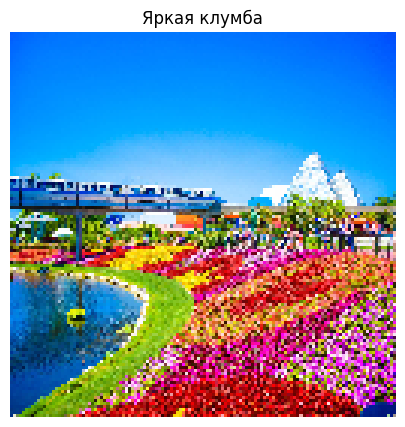

In [ ]:
draw_picture(img, 'Яркая клумба')

# **2. Реализуйте три модели кластеризации:**

**a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [ ]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df

In [ ]:
df_img = image_to_pandas(img)

In [ ]:
kmeans2 = KMeans(n_clusters = 2, random_state = 42).fit(df_img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
center = np.uint8(kmeans2.cluster_centers_)
res = center[kmeans2.labels_.flatten()]
result_kmeans2 = res.reshape(img.shape)

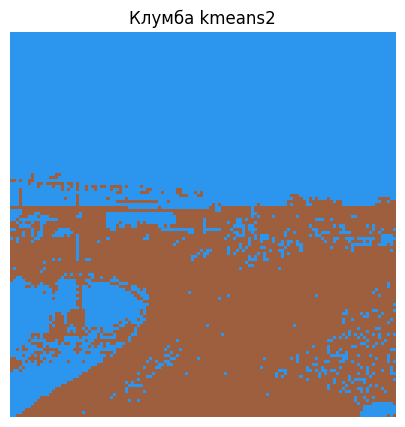

In [ ]:
draw_picture(result_kmeans2, 'Клумба kmeans2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


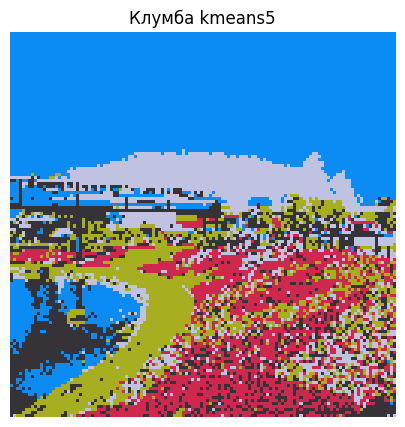

In [ ]:
kmeans5 = KMeans(n_clusters = 5, random_state = 42).fit(df_img)
center = np.uint8(kmeans5.cluster_centers_)
res = center[kmeans5.labels_.flatten()]
result_kmeans5 = res.reshape(img.shape)
draw_picture(result_kmeans5, 'Клумба kmeans5')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


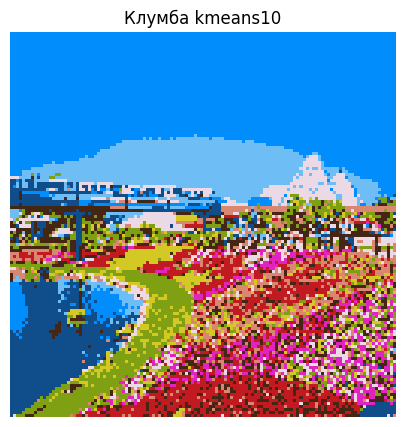

In [ ]:
kmeans10 = KMeans(n_clusters = 10, random_state = 42).fit(df_img)
center = np.uint8(kmeans10.cluster_centers_)
res = center[kmeans10.labels_.flatten()]
result_kmeans10 = res.reshape(img.shape)
draw_picture(result_kmeans10, 'Клумба kmeans10')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


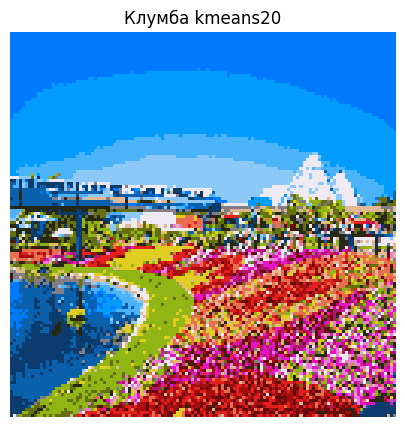

In [ ]:
kmeans20 = KMeans(n_clusters = 20, random_state = 42).fit(df_img)
center = np.uint8(kmeans20.cluster_centers_)
res = center[kmeans20.labels_.flatten()]
result_kmeans20 = res.reshape(img.shape)
draw_picture(result_kmeans20, 'Клумба kmeans20')

**b) DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

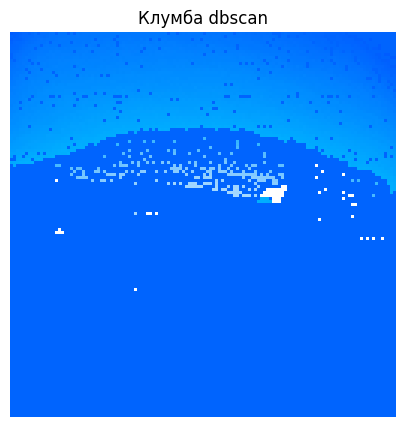

In [ ]:
img2 = img.copy()
X = img2.reshape((-1,3))

DBSCAN_model = DBSCAN().fit(X)
labels = DBSCAN_model.labels_

for l in np.unique(DBSCAN_model.labels_):
  first_idx_of_lable = np.min(np.argwhere(DBSCAN_model.labels_ == l))
  X[DBSCAN_model.labels_ == l] = X[first_idx_of_lable]

result_dbscan = X.reshape(img.shape)
draw_picture(result_dbscan, 'Клумба dbscan')

**c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AggCl = AgglomerativeClustering(n_clusters = 2).fit(df_img)

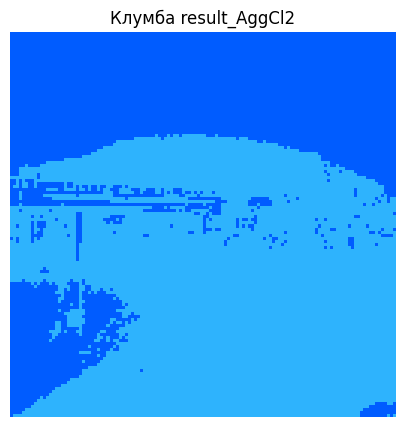

In [ ]:
img2 = img.copy()
X = img2.reshape((-1,3))

AggCl = AgglomerativeClustering(n_clusters = 2).fit(X)

for l in np.unique(AggCl.labels_):
  first_idx_of_lable = np.min(np.argwhere(AggCl.labels_ == l))
  X[AggCl.labels_ == l] = X[first_idx_of_lable]

result_AggCl2 = X.reshape(img.shape)
draw_picture(result_AggCl2, 'Клумба result_AggCl2')

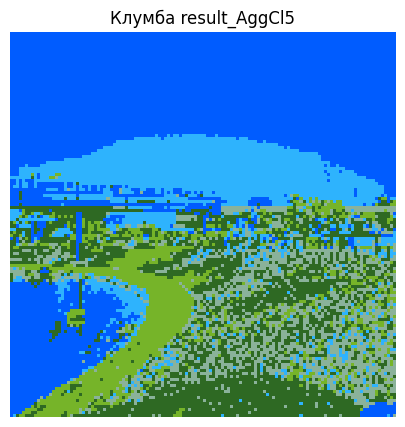

In [ ]:
img2 = img.copy()
X = img2.reshape((-1,3))

AggCl = AgglomerativeClustering(n_clusters = 5).fit(X)

for l in np.unique(AggCl.labels_):
  first_idx_of_lable = np.min(np.argwhere(AggCl.labels_ == l))
  X[AggCl.labels_ == l] = X[first_idx_of_lable]

result_AggCl5 = X.reshape(img.shape)
draw_picture(result_AggCl5, 'Клумба result_AggCl5')

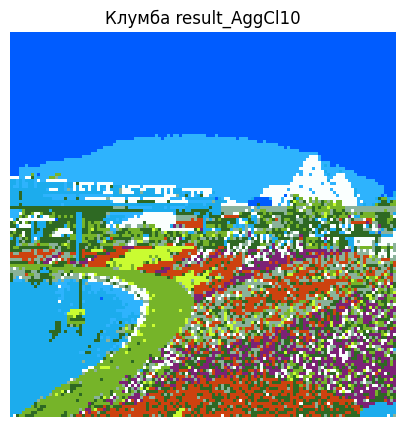

In [ ]:
img2 = img.copy()
X = img2.reshape((-1,3))

AggCl = AgglomerativeClustering(n_clusters = 10).fit(X)

for l in np.unique(AggCl.labels_):
  first_idx_of_lable = np.min(np.argwhere(AggCl.labels_ == l))
  X[AggCl.labels_ == l] = X[first_idx_of_lable]

result_AggCl10 = X.reshape(img.shape)
draw_picture(result_AggCl10, 'Клумба result_AggCl10')

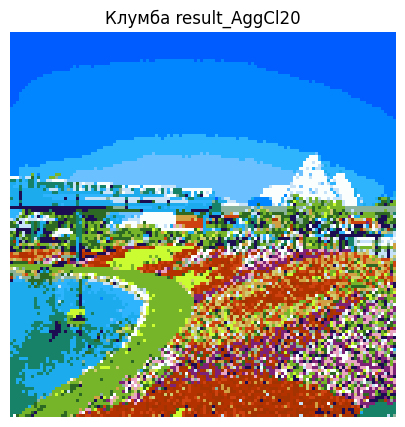

In [ ]:
img2 = img.copy()
X = img2.reshape((-1,3))

AggCl = AgglomerativeClustering(n_clusters = 20).fit(X)

for l in np.unique(AggCl.labels_):
  first_idx_of_lable = np.min(np.argwhere(AggCl.labels_ == l))
  X[AggCl.labels_ == l] = X[first_idx_of_lable]

result_AggCl20 = X.reshape(img.shape)
draw_picture(result_AggCl20, 'Клумба result_AggCl20')

# **3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.**

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
ssim_kmeans2 = ssim(img, result_kmeans2, channel_axis=2)
print(ssim_kmeans2)

0.3377127904480788


In [ ]:
ssim_kmeans5 = ssim(img, result_kmeans5, channel_axis=2)
print(ssim_kmeans5)

0.6632569750717586


In [ ]:
ssim_kmeans10 = ssim(img, result_kmeans10, channel_axis=2)
print(ssim_kmeans10)

0.8158054997846097


In [ ]:
ssim_kmeans20 = ssim(img, result_kmeans20, channel_axis=2)
print(ssim_kmeans20)

0.8724134434405432


In [ ]:
ssim_dbscan = ssim(img, result_dbscan, channel_axis=2)
print(ssim_dbscan)

0.28857256608496595


In [ ]:
ssim_AggCl2 = ssim(img, result_AggCl2, channel_axis=2)
print(ssim_AggCl2)

0.3567491451388465


In [ ]:
ssim_AggCl5 = ssim(img, result_AggCl5, channel_axis=2)
print(ssim_AggCl5)

0.6181669036169567


In [ ]:
ssim_AggCl10 = ssim(img, result_AggCl10, channel_axis=2)
print(ssim_AggCl10)

0.7171985470338297


In [ ]:
ssim_AggCl20 = ssim(img, result_AggCl20, channel_axis=2)
print(ssim_AggCl20)

0.7856865652731219


# **4. Сформулируйте выводы по проделанной работе.**

**a) Какая модель показала лучший результат?**

Лучший результат показала модель Kmeans на 20 кластерах, что видно даже визуально